## importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
sns.set()

## reading data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
dataset = [df_train, df_test]

In [4]:
dataset = [df_train, df_test]
for df in dataset:
    df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
    df.drop(['Ticket'], axis=1, inplace=True)

In [5]:
df_train.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [6]:
dataset = [df_train, df_test]
for data in dataset:
    n = data.nunique()
  
    print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64
No.of.unique values in each column :
 Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        169
Cabin        76
Embarked      3
dtype: int64


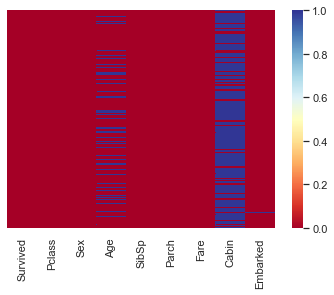

In [7]:
sns.heatmap(df_train.isnull(), yticklabels=False, cmap='RdYlBu')

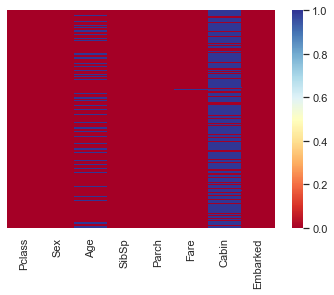

In [8]:
sns.heatmap(df_test.isnull(), yticklabels=False, cmap='RdYlBu')

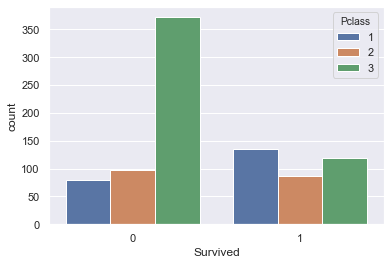

In [9]:
sns.countplot(x='Survived', hue="Pclass", data=df_train)

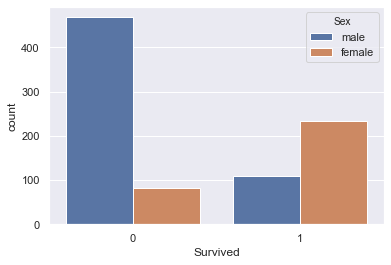

In [10]:
sns.countplot(x="Survived", hue='Sex', data=df_train)

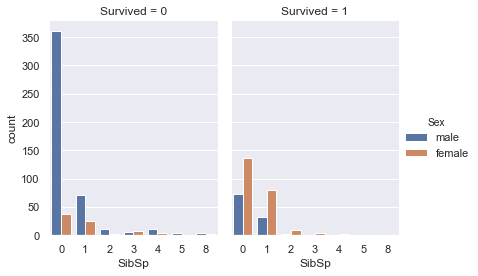

In [12]:
sns.catplot(x="SibSp", hue="Sex", col="Survived",data=df_train, kind="count", height=4, aspect=.7)

In [13]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

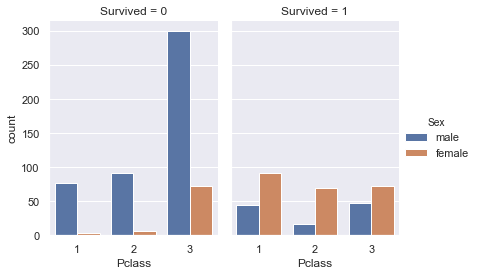

In [14]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",data=df_train, kind="count", height=4, aspect=.7)

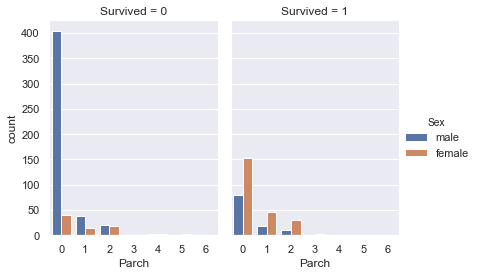

In [15]:
sns.catplot(x="Parch", hue="Sex", col="Survived",data=df_train, kind="count", height=4, aspect=.7)

In [16]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

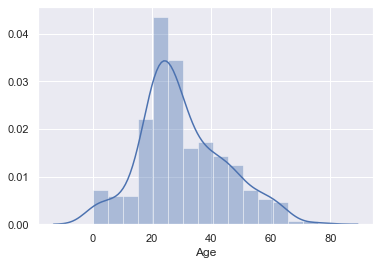

In [17]:
sns.distplot(df['Age'])

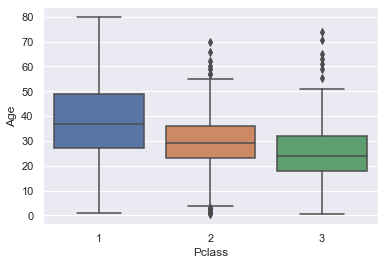

In [18]:
sns.boxplot(x="Pclass", y="Age", data=df_train)

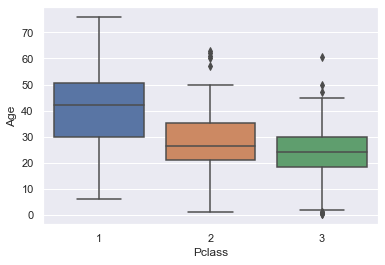

In [19]:
sns.boxplot(x="Pclass", y="Age", data=df_test)

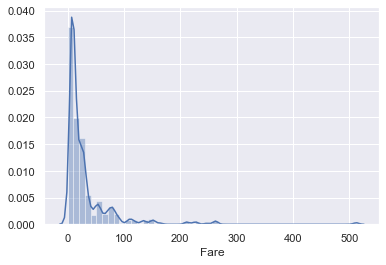

In [20]:
sns.distplot(df_train['Fare'])

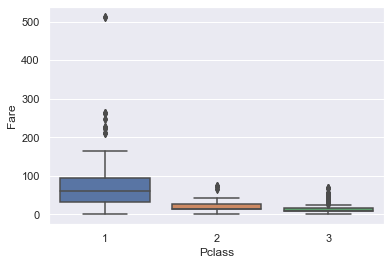

In [21]:
sns.boxplot(x="Pclass", y="Fare", data=df_train) 

## Dealing with missing data

In [22]:
for df in dataset:
    print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [23]:
# def impudeAge(col):
#     age = col[0]
#     pclass = col[1]
    
#     return 40 if pclass == 1 else 35 if pclass == 2 else 26 if pclass == 3 else age
# for data in dataset:
#     data['Age'] = data['Age'].apply(impudeAge, axis=1)

In [24]:
dataset = [df_train, df_test]
for data in dataset:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = data["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = data["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data["Age"] = age_slice
    data["Age"] = df_train["Age"].astype(int)
df_train["Age"].isnull().sum()

0

In [25]:
df_test["Age"].isnull().sum()

0

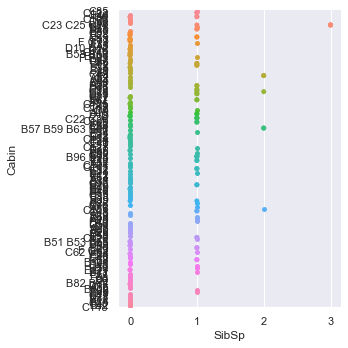

In [26]:
sns.catplot(x="SibSp", y="Cabin", data=df_train)

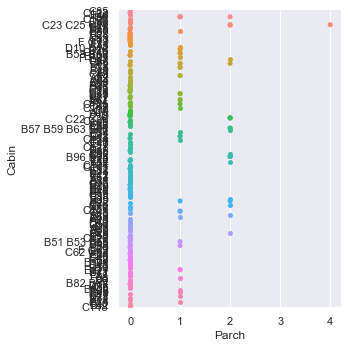

In [27]:
sns.catplot(x="Parch", y="Cabin", data=df_train)

In [28]:
# creating a columns 'relatives'
dataset = [df_train, df_test]
for data in dataset:
    data['relatives'] = data['SibSp'] + data['Parch']
    data['not_alone'] = data['relatives'].apply(lambda x: 1 if x == 0 else 0)
    data['not_alone'] = data['not_alone'].astype(int)
    print(data['not_alone'].value_counts())


1    537
0    354
Name: not_alone, dtype: int64
1    253
0    165
Name: not_alone, dtype: int64


E:\anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


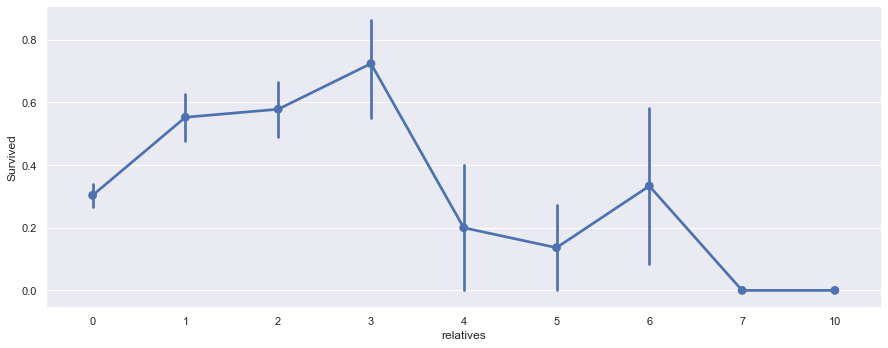

In [29]:
axes = sns.factorplot('relatives','Survived', 
                      data=df_train, aspect = 2.5, )

In [30]:
#  A cabin number looks like ‘C123’ and the letter refers to the deck.
#  Therefore we’re going to extract these and create a new feature, that contains a persons deck

In [31]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

dataset = [df_train, df_test]
for data in dataset:
    data['Cabin'] = data['Cabin'].fillna("U0")
    data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    data['Deck'] = data['Deck'].map(deck)
    data['Deck'] = data['Deck'].fillna(0)
    data['Deck'] = data['Deck'].astype(int)
# we can now drop the cabin feature
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [32]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [33]:
dataset = [df_train, df_test]
for df in dataset:
    df['Embarked'] = df['Embarked'].fillna('S')

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    int32  
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   relatives  891 non-null    int64  
 9   not_alone  891 non-null    int32  
 10  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 66.3+ KB


In [35]:
dataset = [df_train, df_test]
for data in dataset:
    data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
    data['Fare'] = data['Fare'].astype(int)

In [36]:
genders = {"male": 0, "female": 1}
dataset = [df_train, df_test]
for data in dataset:
    data['Sex'] = data['Sex'].map(genders)

In [37]:
ports = {"S": 0, "C": 1, "Q": 2}
dataset = [df_train, df_test]
for data in dataset:
    data['Embarked'] = data['Embarked'].map(ports)

In [38]:
df_train.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck
0,0,3,0,22,1,0,7,0,1,0,8
1,1,1,1,38,1,0,71,1,1,0,3
2,1,3,1,26,0,0,7,0,0,1,8
3,1,1,1,35,1,0,53,0,1,0,3
4,0,3,0,35,0,0,8,0,0,1,8
5,0,3,0,38,0,0,8,2,0,1,8
6,0,1,0,54,0,0,51,0,0,1,5
7,0,3,0,2,3,1,21,0,4,0,8


## Define Variables

In [39]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:,0]

In [40]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Stochastic Gradient Descent (SGD)

In [41]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X, y)
# Y_pred = sgd.predict(df_test)

sgd.score(X, y)

acc_sgd = round(sgd.score(X, y) * 100, 2)

## Logistic Regression

In [42]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_scaled, y)

acc_log = round(logreg.score(X_scaled, y) * 100, 2)

## Decision Tree

In [43]:
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(X,y)

acc_tree = round(tree_reg.score(X, y) * 100, 2)

## Random forest

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X,y)

random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)

## Gradient Boosting

In [48]:
gb_reg = GradientBoostingClassifier(random_state=42)
gb_reg.fit(X,y)

gb_reg.score(X, y)
acc_gb = round(gb_reg.score(X, y) * 100, 2)

## KNN

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X, y)
  
acc_knn = round(knn.score(X, y) * 100, 2)

## Perceptron

In [50]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(X, y)

acc_perceptron = round(perceptron.score(X, y) * 100, 2)

## Gaussian Naive Bayes

In [57]:
gaussian = GaussianNB() 
gaussian.fit(X, y)
  
acc_gaussian = round(gaussian.score(X, y) * 100, 2)

## Support Vector Machine

In [51]:
svc = SVC()
svc.fit(X, y)

acc_svc = round(svc.score(X, y) * 100, 2)

## Linear Support Vector Machine

In [52]:
linear_svc = LinearSVC(max_iter=100)
linear_svc.fit(X, y)

acc_linear_svc = round(linear_svc.score(X, y) * 100, 2)

E:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Xg Bosst

In [53]:
xg_reg = XGBClassifier(random_state=42)
xg_reg.fit(X,y)

acc_xg = round(xg_reg.score(X, y) * 100, 2)

## Voting Classifier

In [54]:
vot_reg1 = VotingClassifier(estimators=[
         ('lr', logreg), ('gb', gb_reg), ('dsc', tree_reg), ('knn', knn)], voting='hard')
vot_reg1 = vot_reg1.fit(X, y)


acc_vt1 = round(vot_reg1.score(X,y)*100,2)

In [55]:
vot_reg2 = VotingClassifier(estimators=[
         ('rf', random_forest), ('lr', logreg), ('xg', xg_reg), ('knn',knn)], voting='hard')
vot_reg2 = vot_reg2.fit(X, y)

acc_vt2 = round(vot_reg2.score(X,y)*100,2)

In [58]:
results = pd.DataFrame({
    'Model': ['Linear Support Vector Machines', 'Support Vector Machines', 'Gradient Boosting', 'KNN', 
              'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree', 'xgboost', 'voting classifier1', 'voting classifier2'],
    'Score': [acc_linear_svc, acc_svc, acc_gb, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_tree, acc_xg, acc_vt1, acc_vt2]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.76,Random Forest
97.76,Decision Tree
90.80,voting classifier1
90.01,voting classifier2
89.34,Gradient Boosting
87.09,xgboost
82.94,KNN
80.58,Logistic Regression
78.00,Naive Bayes


## CV on Random forest

In [59]:
scores = cross_val_score(xg_reg, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.82022472 0.76404494 0.83146067 0.85393258 0.83146067
 0.85393258 0.79775281 0.87640449 0.85393258]
Mean: 0.828314606741573
Standard Deviation: 0.0319891409425155


In [60]:
scores = cross_val_score(vot_reg2, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.80898876 0.76404494 0.84269663 0.84269663 0.82022472
 0.84269663 0.76404494 0.86516854 0.84269663]
Mean: 0.8193258426966292
Standard Deviation: 0.032983987652869695


## Feature importance

In [61]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(xg_reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.527
Pclass,0.168
SibSp,0.071
Deck,0.070
Embarked,0.051
relatives,0.044
Age,0.034
Fare,0.025
Parch,0.011


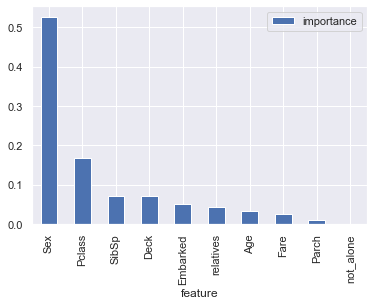

In [62]:
importances.plot.bar()

In [120]:
# droping features

In [63]:
X  = X.drop("not_alone", axis=1)
df_test  = df_test.drop("not_alone", axis=1)

X  = X.drop("Parch", axis=1)
df_test  = df_test.drop("Parch", axis=1)

In [64]:
scores = cross_val_score(xg_reg, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.80898876 0.7752809  0.84269663 0.85393258 0.83146067
 0.85393258 0.79775281 0.88764045 0.85393258]
Mean: 0.8316729088639201
Standard Deviation: 0.03163605920200144


## Hyper tuning

In [65]:
# params_grid = {
#     'learning_rate':[0.1, 0.01, 0.05],
#     'max_depth':[5, 6, 7],
#     'gamma':[0, 0.25, 1.0],
#     'reg_lambda':[0, 1.0, 10.0],
#     'colsample_bytree':[0.7, 0.8, 0.9],
#     'subsample':[0.7, 0.8, 0.9]
# }
# optimal_params = GridSearchCV(estimator=xg_reg,
#                             param_grid=params_grid, 
#                             scoring='neg_mean_squared_error', 
#                             cv=5)
# optimal_params.fit(X,y)

In [66]:
# print(optimal_params.best_params_)

In [67]:
# params_grid1 = {
#     'learning_rate':[0.1],
#     'max_depth':[3, 4, 5],
#     'gamma':[1.0, 1.5],
#     'reg_lambda':[0],
#     'reg_alpha':[0, 1, 10],
#     'colsample_bytree':[0.9, 1],
#     'subsample':[0.7,1]
# }
# optimal_params1 = GridSearchCV(estimator=xg_reg,
#                             param_grid=params_grid1, 
#                             scoring='neg_mean_squared_error', 
#                             cv=5)
# optimal_params1.fit(X,y)

In [68]:
# print(optimal_params1.best_params_)

In [69]:
# params_grid2 = {
#     'learning_rate':[0.1],
#     'max_depth':[5],
#     'gamma':[1.0],
#     'reg_lambda':[0],
#     'reg_alpha':[0],
#     'colsample_bytree':[0.9],
#     'subsample':[0.7],
#     'n_estimators':[100,200,300,500,750]
# }
# optimal_params2 = GridSearchCV(estimator=xg_reg,
#                             param_grid=params_grid2, 
#                             scoring='neg_mean_squared_error', 
#                             cv=5)
# optimal_params2.fit(X,y)
# print(optimal_params2.best_params_)

## Predicting value using gradient boost method

In [70]:
opt_xg_reg = XGBClassifier(learning_rate=0.1,
                                        max_depth=5,
                                        gamma=1,
                                        reg_alpha=0,
                                        reg_lambda=0,
                                        subsample=0.7,
                                        colsample_bytree=0.9,
                                        n_estimators=100,
                                        random_state=42)
opt_xg_reg.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [71]:
## Voting Classifier with optimized Xg_boost

In [72]:
vot_reg3 = VotingClassifier(estimators=[
         ('rf', random_forest), ('lr', logreg), ('xg', opt_xg_reg), ('knn',knn)], voting='soft')
vot_reg3 = vot_reg3.fit(X, y)

# Y_pred = vot_reg2.predict(df_test)

acc_vt3 = round(vot_reg3.score(X,y)*100,2)
print(acc_vt3)

92.82


In [73]:
scores = cross_val_score(vot_reg3, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.79775281 0.75280899 0.78651685 0.87640449 0.80898876
 0.86516854 0.7752809  0.83146067 0.85393258]
Mean: 0.8159425717852684
Standard Deviation: 0.03830215693549688


## Evaluation

In [74]:
predictions = cross_val_predict(vot_reg3, X, y, cv=5)
confusion_matrix(y, predictions)

array([[481,  68],
       [101, 241]], dtype=int64)

## Precision and Recall

In [75]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y, predictions))
print("Recall:",recall_score(y, predictions))

Precision: 0.7799352750809061
Recall: 0.7046783625730995


## F-Score

In [76]:
from sklearn.metrics import f1_score
f1_score(y, predictions)

0.7403993855606759

## Precision Recall Curve

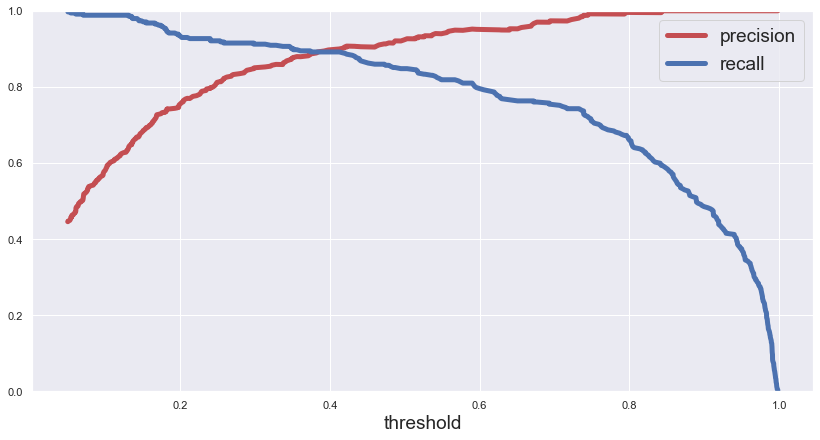

In [77]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = opt_xg_reg.predict_proba(X)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


## ROC AUC Curve

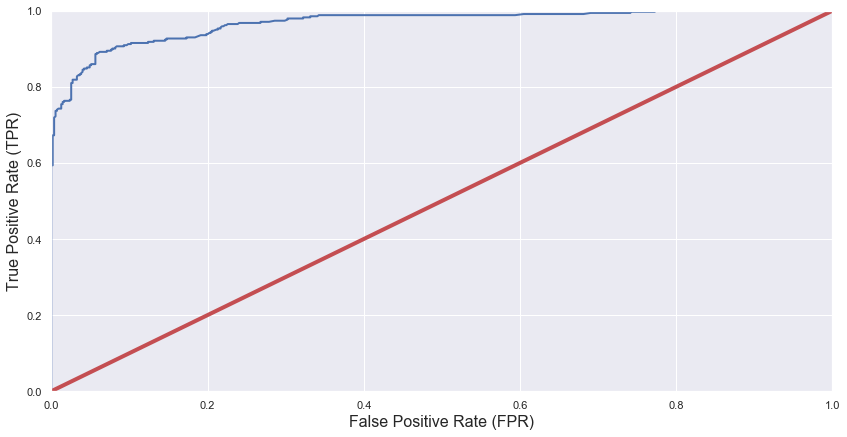

In [78]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9678069642838122


## Predicting test data

In [80]:
y_pred = vot_reg3.predict(df_test)
y_pred.shape

(418,)

In [81]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('gender_submission.csv')
dataset1 = pd.concat([sub_df['PassengerId'], pred], axis=1)
dataset1.columns = ['PassengerId','Survived']
dataset1.to_csv('gender_submission2.csv', index=False)